In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import warnings
from warnings import warn
from tqdm.notebook import tqdm,trange # to display loading bars
%load_ext autoreload
%autoreload 2

from BenamouBrenier import TransportProblem
from transport import gaussian_transport, gaussian_discreatization, random_gaussian_parameters

In [2]:
def torus_dist2(x,y):
    dist = np.min([(x[0]-y[0])**2, (1-np.abs(x[0]-y[0]))**2])
    dist = dist + np.min([(x[1]-y[1])**2, (1-np.abs(x[1]-y[1]))**2])
    return dist

d = torus_dist2(np.array([0,0.5]), np.array([0.75,0.5]))
np.sqrt(d)

0.25

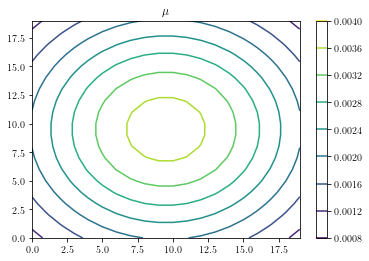

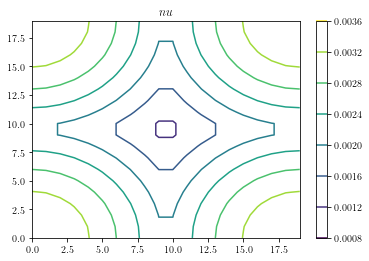

TransportProblem object initialized.


  0%|          | 0/30 [00:00<?, ?it/s]

/Users/benoitmuller/opt/anaconda3/lib/python3.9/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:144: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  warn('spsolve requires A be CSC or CSR matrix format',


Poisson step: 6.497756004333496
projection step: 0.2305307388305664
dual step: 0.00476384162902832
Poisson step: 6.138071775436401
projection step: 0.8330929279327393
dual step: 0.0006868839263916016
Poisson step: 6.17283296585083
projection step: 0.6217758655548096
dual step: 0.0004668235778808594
Poisson step: 8.221376180648804
projection step: 7.786855936050415
dual step: 0.001827239990234375
Poisson step: 9.565097093582153
projection step: 0.23699712753295898
dual step: 0.0003840923309326172
Poisson step: 5.197291135787964
projection step: 0.23416972160339355
dual step: 0.00029778480529785156
Poisson step: 3.753964900970459
projection step: 0.22417783737182617
dual step: 0.00026988983154296875
Poisson step: 4.226033926010132
projection step: 0.5094447135925293
dual step: 0.0003917217254638672
Poisson step: 596.0901892185211
projection step: 0.594684362411499
dual step: 0.00643467903137207
Poisson step: 16.407823085784912
projection step: 0.5114109516143799
dual step: 0.000396013259

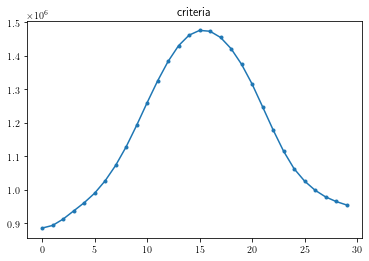

In [3]:
%matplotlib inline
plt.rcParams['text.usetex'] = True

rng = np.random.default_rng(123)
from scipy.stats import multivariate_normal
from matplotlib.widgets import Slider
N=20
T=N
mesh= np.array(np.meshgrid(np.linspace(0,1,N),np.linspace(0,1,N)))

#mean1, cov1 = random_gaussian_parameters(2,rng)
#mean2, cov2 = random_gaussian_parameters(2,rng)
sigma = 0.2
mean1 , cov1 = 0.5 * np.ones((2)) , sigma * np.eye(2)
mean2 , cov2 = 1 * np.ones((2)) , sigma * np.eye(2)

mu,nu = np.empty((N,N)),np.empty((N,N))
for idx in np.ndindex((N,N)):
    mu[idx] = np.exp(-0.5*torus_dist2(mesh[(...,*idx)],mean1)/sigma)
    nu[idx] = np.exp(-0.5*torus_dist2(mesh[(...,*idx)],mean2)/sigma)
mu = mu/np.sum(mu)
nu = nu/np.sum(nu)

plt.figure()
plt.contour(mu)
plt.colorbar()
plt.title("$\mu$")
plt.savefig("graphics/mu.pdf")

plt.figure()
plt.contour(nu)
plt.colorbar()
plt.title("$nu$")
plt.savefig("graphics/nu.pdf")
plt.show()

prob1 = TransportProblem(mesh,mu,nu,T,tau=0.1)
criteria = prob1.solve(maxiter=30)
plt.plot(criteria,'.-')
plt.title("criteria")
plt.savefig("graphics/criteria.pdf")

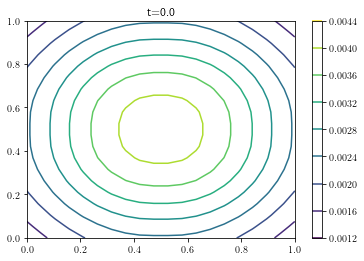

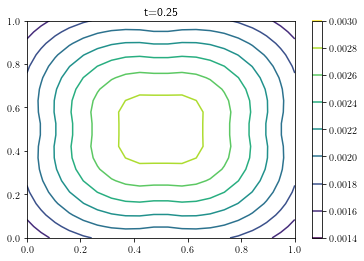

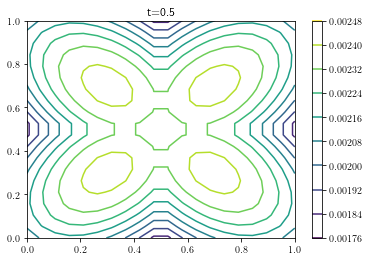

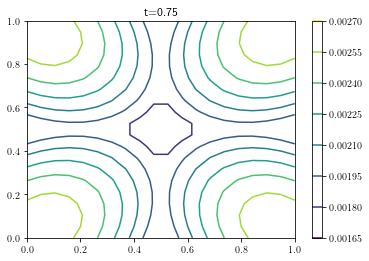

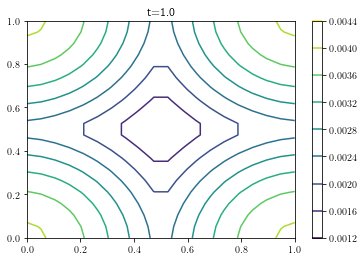

In [4]:
%matplotlib inline
tt= np.linspace(0,1,5)
prob1.plot(tt)

In [6]:
%matplotlib
fig = prob1.plot()

Using matplotlib backend: MacOSX


: 